In [8]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Prepara los datos de entrenamiento
# X serán los datos de entrada, y los de salida en este ejemplo

# Ejemplo de Regresión Logística en Python
### Datos
Vamos a suponer que queremos predecir cuál es la probabilidad que tiene un estudiante de aprobar un examen en función de las horas que ha estudiado. Date cuenta que para 1.75 horas de estudio, hay un estudiante que aprueba y el otro que no.

In [3]:
X = np.array([0.5, 0.75, 1, 1.25, 1.5, 1.75, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 4, 4.25, 4.5, 4.75, 5, 5.5]).reshape(-1,1)
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [4]:
# Creamos una instancia de la Regresión Logística
regresion_logistica = LogisticRegression()

In [5]:
# Entrena la regresión logística con los datos de entrenamiento
regresion_logistica.fit(X,y)

LogisticRegression()

# Haciendo predicciones
Vamos a ver cómo podemos hacer predicciones una vez que el modelo está entrenado. Primero haremos predicciones absolutas y luego predicciones relativas. Vamos a ver qué pasa si estudiamos 1, 2, 3, 4, 5 ó 6 horas.

In [6]:
X_nuevo = np.array([1, 2, 3, 4, 5, 6]).reshape(-1,1)

In [7]:
# Usa el modelo entrenado para obtener las predicciones con datos nuevos
prediccion = regresion_logistica.predict(X_nuevo)
print(prediccion)

[0 0 1 1 1 1]


In [8]:
probabilidades_prediccion = regresion_logistica.predict_proba(X_nuevo)
print(probabilidades_prediccion)

[[0.87984046 0.12015954]
 [0.69895285 0.30104715]
 [0.42402118 0.57597882]
 [0.18924992 0.81075008]
 [0.06891381 0.93108619]
 [0.02293029 0.97706971]]


In [9]:
# produce el siguiente resultado (la primera columna es la probabilidad de reprobar y la segunda columna es 
# la probabilidad de aprobar)
# [[0.87984046 0.12015954]
# [0.69895285 0.30104715]
# [0.42402118 0.57597882]
# [0.18924992 0.81075008]
# [0.06891381 0.93108619]
# [0.02293029 0.97706971]]

In [10]:
# Como seguramente estamos más interesados en la probabilidad de aprobar,
# podemos centrarnos en la segunda columna
print(probabilidades_prediccion[:,1])

[0.12015954 0.30104715 0.57597882 0.81075008 0.93108619 0.97706971]


### produce el resultado: [0.12015954 0.30104715 0.57597882 0.81075008 0.93108619 0.97706971]

Si estudia 1 hora, tendra la probabilidad de aprobar de un 12%  
Si estudia 2 hora, tendra la probabilidad de aprobar de un 30%  
Si estudia 3 hora, tendra la probabilidad de aprobar de un 57%  
Si estudia 4 hora, tendra la probabilidad de aprobar de un 81%  
Si estudia 5 hora, tendra la probabilidad de aprobar de un 93%  
Si estudia 6 hora, tendra la probabilidad de aprobar de un 97%  

# Regresión Logística con dataframe

In [24]:
dataframe = pd.read_csv("../clauo/marketing_campaign.csv")
dataframe.head(5)

,NumDealsPurchases,Response
0,3,1
1,2,0
2,1,0
3,2,0
4,5,0


In [25]:
dataframe.describe()

,NumDealsPurchases,Response
count,2240.000000,2240.000000
mean,2.325000,0.149107
std,1.932238,0.356274
min,0.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,3.000000,0.000000
max,15.000000,1.000000


In [27]:
print(dataframe.groupby('NumDealsPurchases').size())

NumDealsPurchases
0      46
1     970
2     497
3     297
4     189
5      94
6      61
7      40
8      14
9       8
10      5
11      5
12      4
13      3
15      7
dtype: int64


In [28]:
print(dataframe.groupby('Response').size())

Response
0    1906
1     334
dtype: int64


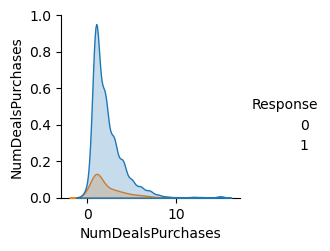

In [29]:
sb.pairplot(dataframe.dropna(), hue='Response',vars=["NumDealsPurchases"],kind='reg')

In [30]:
X = np.array(dataframe.drop(['Response'],1)) 
y = np.array(dataframe['Response'])
X.shape

(2240, 1)

In [31]:
regresion_logistica = LogisticRegression()

In [32]:
regresion_logistica.fit(X,y)

LogisticRegression()